In [1]:
#Lab4
#Class:ELEC4511 HardwareSoftware
#Name:Fuwei Huang,Claire Charlton,John Milner

In [2]:
import numpy as np
import gzip, pickle, sys
import matplotlib.pyplot as plt

In [3]:
conv1_w=np.load("conv1_w.npy") # (16,1,3,3) Kernal size:3x3x1 16 filters in total
conv1_b=np.load("conv1_b.npy") # (16)
conv2_w=np.load("conv2_w.npy") # (32，16，3，3） Keral size: 3x3x16, 32 filters in total
conv2_b=np.load("conv2_b.npy") # (16,)
fc_w=np.load("fc_w.npy") # (10,1568)
fc_b=np.load("fc_b.npy") # (10,)

In [4]:
def conv_forward(z,k,b,padding=0):
    stride=1
    N,C,H,W=z.shape #Number of input, Channel, Height, Width
    F,_,FH,FW= k.shape #Number of fiter,_, Filter height, Filter width
    H_out=1+(H + 2 *padding - FH) //stride #Calculate the output height
    W_out=1+(W + 2 *padding - FW) //stride #Calculate the output width
    conv_z = np.zeros((N,F,H_out,W_out)) 
    pad_widths =((0,),(0,),(padding,),(padding,)) #Add padding
    xpad = np.pad(z,pad_widths, 'constant')
    Npad,Cpad,Hpad,Wpad=xpad.shape 
    
    for n in range(N): #For number of image
        for f in range(F): #For number of filters
            for i in range(H_out): #For output height
                for j in range(W_out):#For output width
                    prod=np.sum(np.multiply(k[f,...],xpad[n,:, i:i+FH, j:j+FW]))
                    conv_z[n,f, int(i/stride), int(j/stride)] = prod + b[f]  #calculate output with bias
    return conv_z

In [5]:
def max_pooling_forward(z,stride=2):
    Hp=2 #Height of the pool
    Wp=2  #Width of the pool
    N,C,H,W=z.shape #Number of input, Channel, Height, Width
    H_out=(H-Hp) //stride + 1 #Calculate the output height
    W_out=(W-Wp) //stride + 1 #Calculate the output width
    pool_z = np.zeros((N,C,H_out,W_out)) 
    for n in range(N): #For number of image
        for c in range(C): #For number of filters
            for k in range(H_out): #For output height
                for l in range(W_out): #For output width
                    #calculate output of maxpooling
                    pool_z[n,c,k,l]= np.max(z[n,c,k *stride:k * stride + Hp, l* stride: l *stride +Wp]) 
    return pool_z

In [6]:
#Relu, flatten, fc_forward
def relu_forward(z):
    """
    relu() activation
    :param z: Layer to be activiated
    :return: Result after activation
    """
    return np.maximum(0,z)

def flatten_forward(z):
    """
    Flatten the multidimensional array
    :param z: multidimensional array,shape(N,di,d2,..)
    :return:
    """
    N=z.shape[0]
    return np.reshape(z,(N,-1))

def fc_forward(z,W,b):
    """
    Forward propagation of the fully connected layer
    :param z: The output of the current layer, shape(N,ln)
    :param W: The weight of the current layer
    :param b: The bias of the current layer
    :return: Output of the next layer
    """
    return np.dot(W, z.transpose())+np.expand_dims(b,1).repeat(z.shape[0],axis=1)

In [7]:
#Main processing function
def forward(X):
    conv1      = conv_forward(x.astype(np.float64),conv1_w,conv1_b,padding=1)
    conv1_relu = relu_forward(conv1)
    maxp1      = max_pooling_forward(conv1_relu.astype(np.float64))
    conv2      = conv_forward(maxp1, conv2_w, conv2_b, padding=1)
    conv2_relu = relu_forward(conv2)
    maxp2      = max_pooling_forward(conv2_relu.astype(np.float64))
    
    flatten    = flatten_forward(maxp2)
    y          = fc_forward(flatten,fc_w,fc_b)
    return y

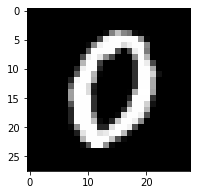

y_true:0,y_predict:0


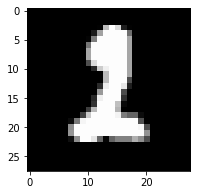

y_true:2,y_predict:2


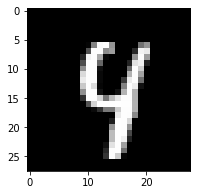

y_true:4,y_predict:4


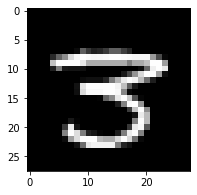

y_true:3,y_predict:3


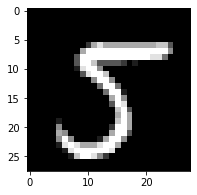

y_true:5,y_predict:5


In [8]:
#Testing
f = gzip.open('mnist.pkl.gz','rb')
if sys.version_info < (3,):
    (X_train,y_train),(X_test,y_test) = pickle.load(f)
else:
    (X_train,y_train),(X_test,y_test) = pickle.load(f,encoding='bytes')
idx = np.random.choice(X_test.shape[0],5)
x,y=X_test[idx],y_test[idx]
x=np.reshape(x,(-1,1,28,28))
y_predict = forward(x)

for i in range(5):
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(x[i],(28,28)), cmap='gray')
    plt.show()
    print("y_true:{},y_predict:{}".format(y[i],np.argmax(y_predict[:,i])))